In [0]:
from matplotlib import pyplot as plt
import networkx as nx
import random

In [0]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + ' \n Edge Count:' + str(len(self.graph.edges)))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

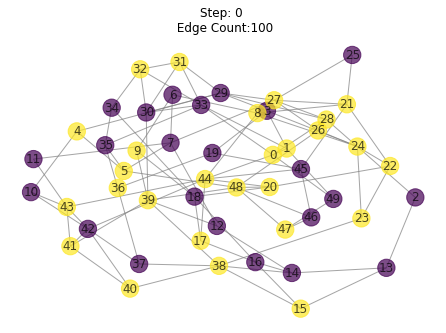

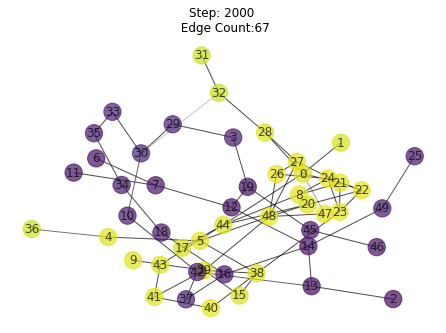

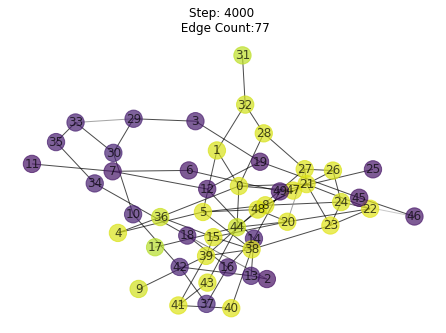

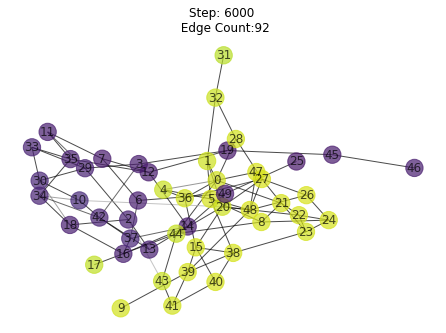

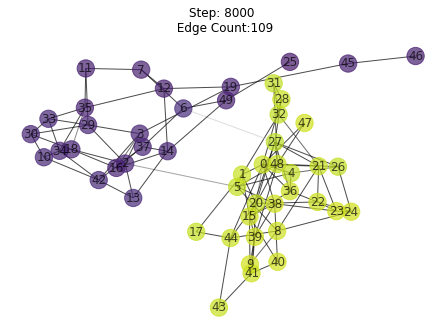

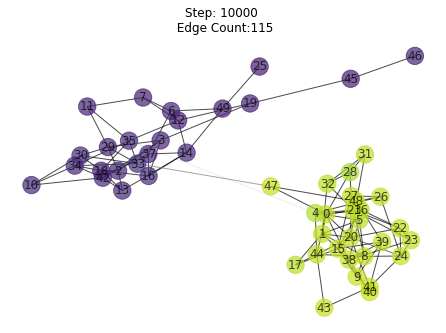

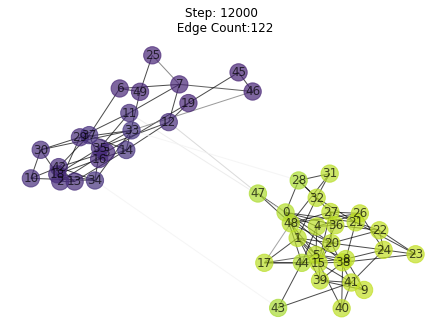

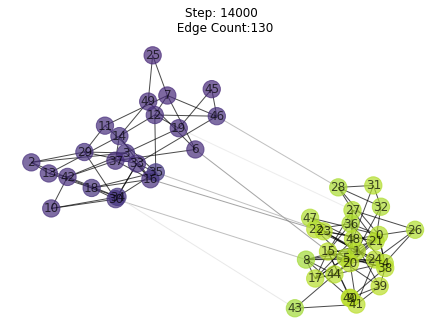

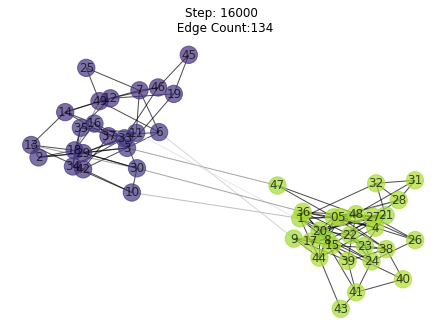

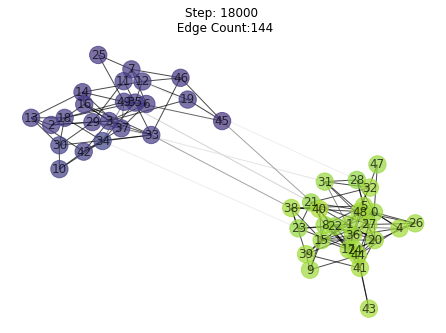

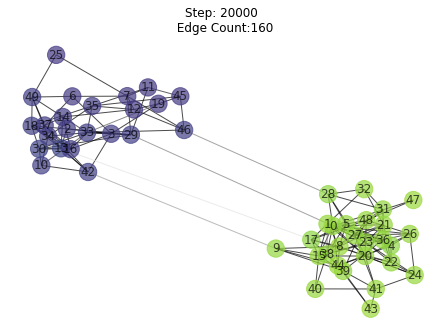

In [144]:
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

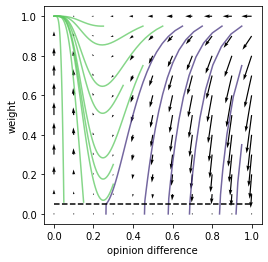

In [158]:
## from solutions PCW 7.2

from matplotlib import pyplot
import itertools
import scipy
alpha = 0.03
beta = 0.3
gamma = 4
cmap = pyplot.cm.viridis # good for color blindness
# Plot traces of how opinion and weight change over time
for opinion, weight in [
[0.25, 0.95], [0.45, 0.95], [0.55, 0.95], [0.65, 0.95], [0.75, 0.95],
[0.85, 0.95], [0.95, 0.95], [0.35, 0.65], [0.45, 0.75], [0.95, 0.75],
[0.95, 0.35], [0.3, 0.25], [0.3, 0.15], [0.15, 0.06], [0.05, 0.06]
]:
    ow = [[opinion, 0.0, weight]]
    for i in range(100):
        delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0])

        delta_w = (
            beta * ow[-1][2] * (1-ow[-1][2]) *
            (1-gamma*abs(ow[-1][1] - ow[-1][0])))
        
        new_weight = ow[-1][2] + delta_w
        
        if new_weight < 0.05:
            new_weight = 0
        ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
    
    pyplot.plot(
        [row[0] - row[1] for row in ow],
        [row[2] for row in ow],
        color=(cmap(0.15) if ow[-1][2] == 0 else cmap(0.75)),
        alpha=0.75)


# Plot vector field
opinion = scipy.linspace(0, 1, 11) # the difference in opinion, |o_i - o_j|
weight = scipy.linspace(0, 1, 11) # the edge weight, w_ij
ow_grid = scipy.meshgrid(opinion, weight)
delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])
pyplot.quiver(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid)

# Annotate plot
pyplot.xlabel('opinion difference')
pyplot.ylabel('weight')
pyplot.plot([0, 1], [0.05, 0.05], 'k--')
pyplot.axis('square')
pyplot.show()

In [0]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
            self.graph.nodes[node]['charm'] = random.normalvariate(0.5,0.1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.charms = [str.format('{0:.2f}', self.graph.nodes[n]['charm']) for n in self.graph.nodes]
        self.mapping = dict(zip(self.graph, self.charms))
        self.graph = nx.relabel.relabel_nodes(self.graph, self.mapping)

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels= True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + ' \n Edge Count:' + str(len(self.graph.edges)))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            charms = [self.graph.nodes[n]['charm'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]) * (charms[1-i]/charms[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                 self.beta * (1.5-charms[0]) * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]


(array([7., 4., 3., 0., 0., 0., 0., 1., 8., 8.]),
 array([0.46943821, 0.49433379, 0.51922938, 0.54412497, 0.56902055,
        0.59391614, 0.61881172, 0.64370731, 0.6686029 , 0.69349848,
        0.71839407]),
 <a list of 10 Patch objects>)

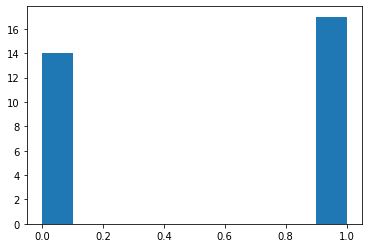

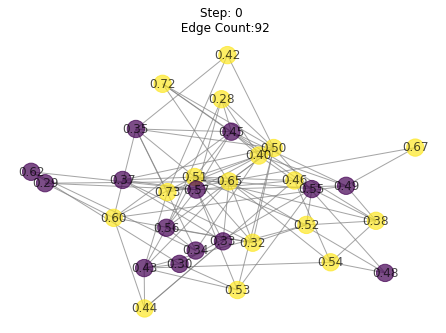

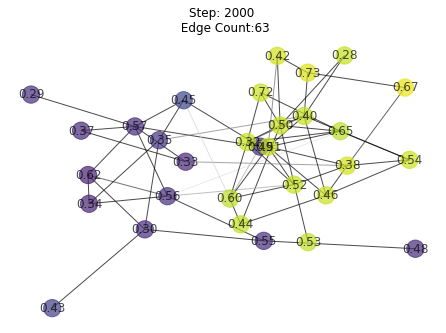

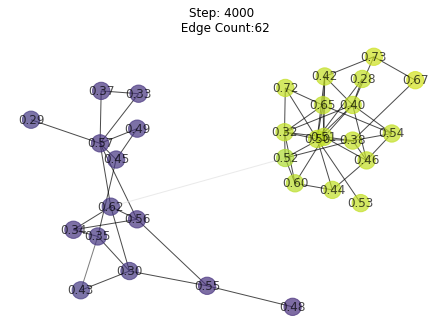

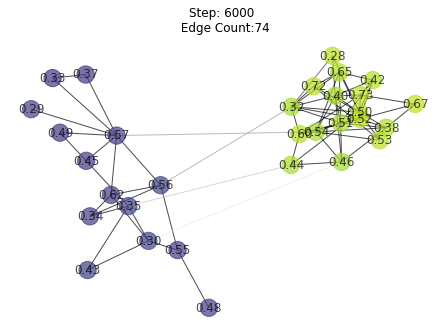

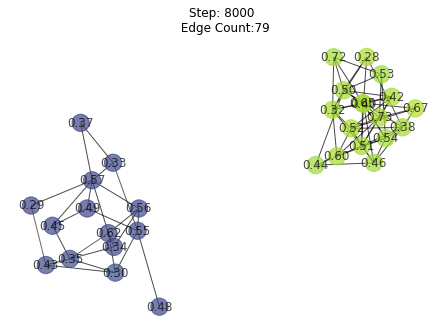

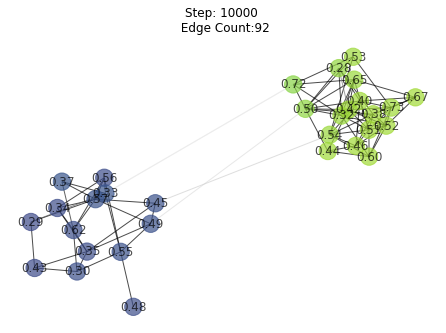

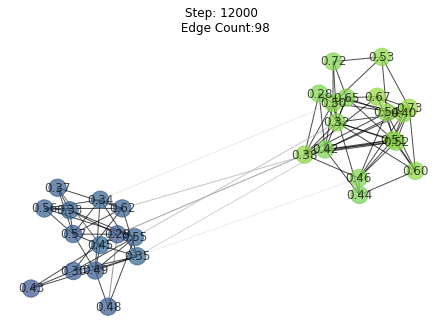

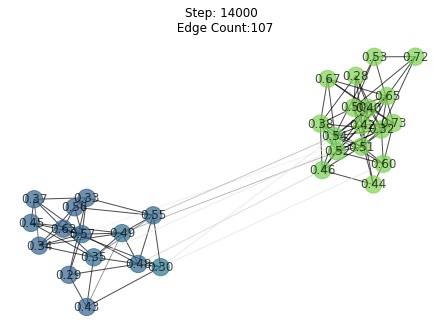

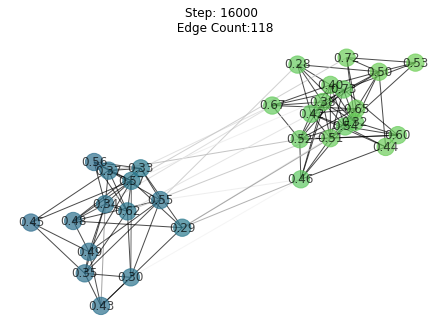

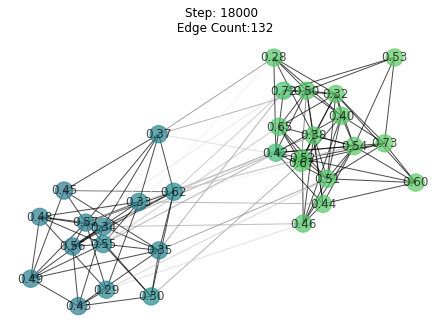

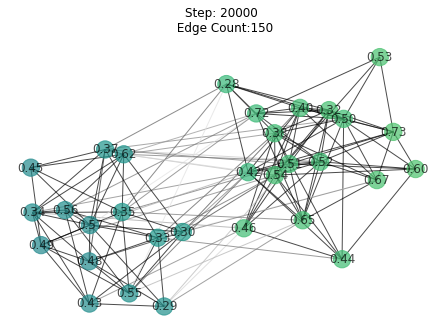

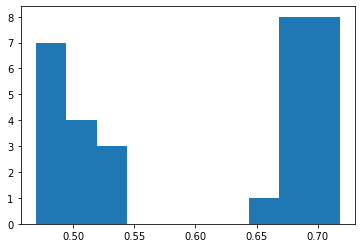

In [146]:
sim = SocialDynamicsSimulation()
sim.initialize()
opinions = [sim.graph.nodes[n]['opinion'] for n in sim.graph.nodes]
print(opinions)
plt.hist(opinions, bins = 10)
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()


plt.figure()
plt.hist([sim.graph.nodes[n]['opinion'] for n in sim.graph.nodes])


In [120]:
print(max([sim.graph.nodes[n]['charm'] for n in sim.graph.nodes]))
print(sum([sim.graph.nodes[n]['opinion'] for n in sim.graph.nodes])/50)

0.8139584034384684
0.2520462806700008


In [0]:
import operator
sorted_x = sorted(sim.mapping.items(), key=operator.itemgetter(1))

In [122]:
[sim.graph.nodes[n[int(1)]] for n in sorted_x]

[{'charm': 0.3265332421789251, 'opinion': 0.7552298432455579},
 {'charm': 0.3417562785592411, 'opinion': 0.7870534371968109},
 {'charm': 0.3564957391434902, 'opinion': 0.728296981425088},
 {'charm': 0.3564957391434902, 'opinion': 0.728296981425088},
 {'charm': 0.3656425882108999, 'opinion': 0.7263153282567518},
 {'charm': 0.3656425882108999, 'opinion': 0.7263153282567518},
 {'charm': 0.3656425882108999, 'opinion': 0.7263153282567518},
 {'charm': 0.40977318723996026, 'opinion': 0.12977808362933524},
 {'charm': 0.41874932682842636, 'opinion': 0.15401960303131856},
 {'charm': 0.4325854634782482, 'opinion': 0.6741610197389512},
 {'charm': 0.4325854634782482, 'opinion': 0.6741610197389512},
 {'charm': 0.4325854634782482, 'opinion': 0.6741610197389512},
 {'charm': 0.4391560737077892, 'opinion': 0.7380677346559974},
 {'charm': 0.4391560737077892, 'opinion': 0.7380677346559974},
 {'charm': 0.4526970302496282, 'opinion': 0.7432619285779184},
 {'charm': 0.4526970302496282, 'opinion': 0.743261928

In [0]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
            self.graph.nodes[node]['opinion2'] = random.randint(0,1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + ' \n Edge Count:' + str(len(self.graph.edges)))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = ([self.graph.nodes[n]['opinion'] for n in edge], [self.graph.nodes[n]['opinion2'] for n in edge])
            
            #finding the one most deviant from 0.5 (i.e., the middle ground opinion):
            op_max = [abs(opinions[0][0] -0.5) + abs(opinions[0][1] -0.5)/2, abs(opinions[1][0]) -0.5 + abs(opinions[1][1] -0.5)/2]
            
            #making the more extreme opinions those that are the determining ones. 
            opinions = opinions[op_max.index(max(op_max))]

            #


            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

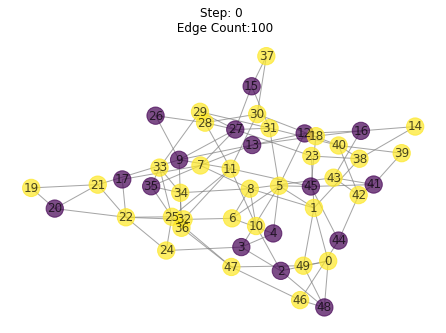

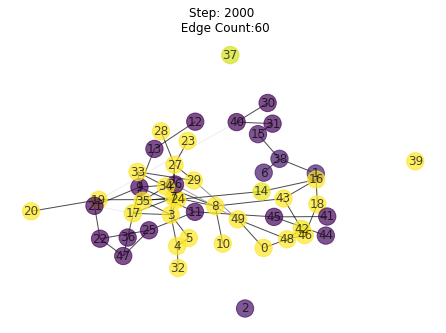

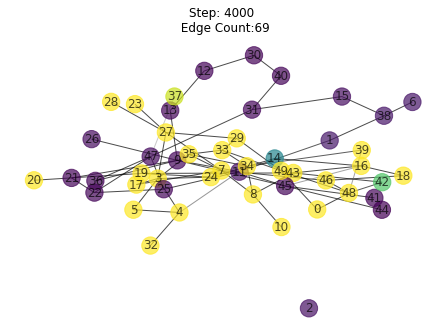

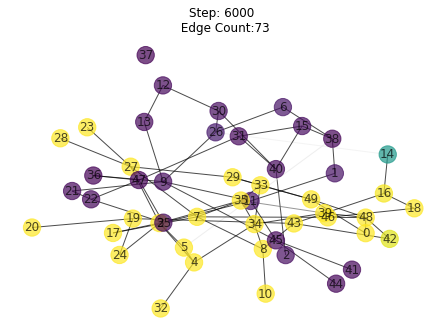

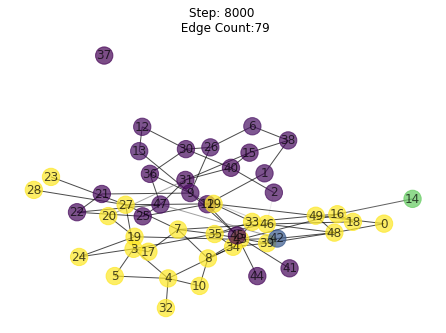

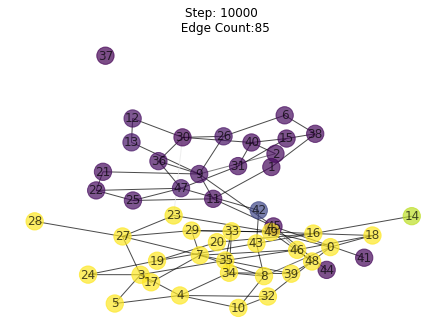

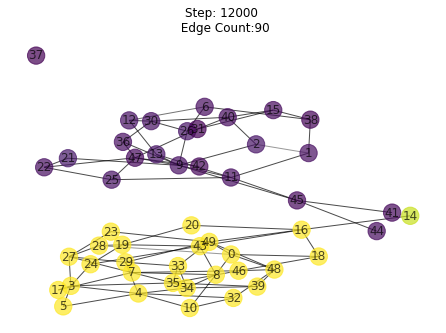

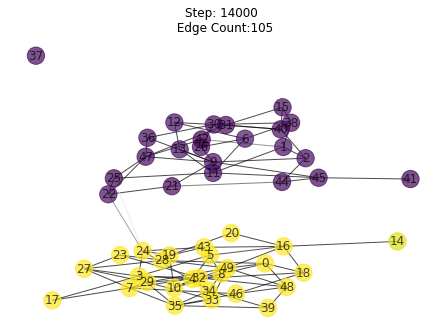

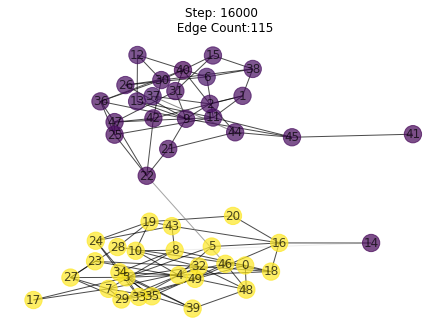

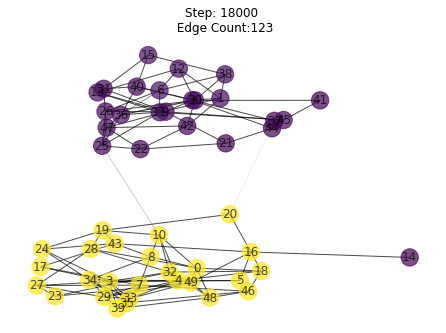

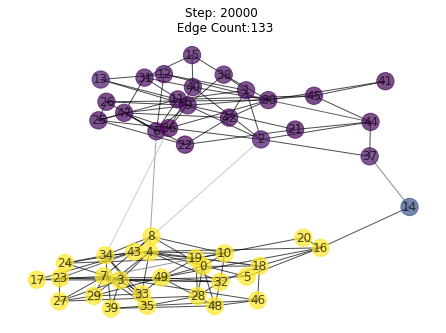

In [188]:
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

In [160]:
op = ([0.2, .3], [0.8, 0.4])
op = random.choice(op)
op

[0.8, 0.4]

In [183]:
op = ([0.2, .3], [0.8, 0.4])
print(op)
op_max = [abs(op[0][0] -0.5) + abs(op[0][1] -0.5)/2, abs(op[1][0]) -0.5 + abs(op[1][1] -0.5)/2]
print(op_max)

([0.2, 0.3], [0.8, 0.4])
[0.4, 0.35000000000000003]
